In [74]:
%run Endo_function_library.ipynb

In [6]:
#Import datasets, hard code
global_dir_path = "C://Users/chris/OneDrive/Desktop/MIT postdoc project/ABN project/Lung cancer/Headspace_data"
#4wks
dir_path0 = global_dir_path + '/2023_0809_Breath_EA_4w/Spectra/Peaks/Int_ratio'
dir_path1 = global_dir_path + '/2023_1019_Breath_EA_4w/Spectra/Peaks/Int_ratio'
#5wks
dir_path2 = global_dir_path + '/2024_0520_Breath_EA_5w/Spectra/Peaks/Int_ratio'
dir_path3 = global_dir_path + '/2024_1105_Breath_EA_5w/Spectra/Peaks/Int_ratio'
#6wks
dir_path4 = global_dir_path + '/2024_0116_Breath_EA_6w/Spectra/Peaks/Int_ratio' 
dir_path5 = global_dir_path + '/2024_0628_Breath_EA_6w/Spectra/Peaks/Int_ratio'

In [7]:
dict_name = {}
dict_name["name0"] = dir_path0 + '/zscore.xlsx'
dict_name["name1"] = dir_path1 + '/zscore.xlsx'
dict_name["name2"] = dir_path2 + '/zscore.xlsx'
dict_name["name3"] = dir_path3 + '/zscore.xlsx'
dict_name["name4"] = dir_path4 + '/zscore.xlsx'
dict_name["name5"] = dir_path5 + '/zscore.xlsx'

In [8]:
df0 = pd.read_excel(dict_name["name0"])
df1 = pd.read_excel(dict_name["name1"])
df2 = pd.read_excel(dict_name["name2"])
df3 = pd.read_excel(dict_name["name3"])
df4 = pd.read_excel(dict_name["name4"])
df5 = pd.read_excel(dict_name["name5"])

df_4w = pd.concat([df0, df1], axis=0, ignore_index=True)
df_5w = pd.concat([df2, df3], axis=0, ignore_index=True)
df_6w = pd.concat([df4, df5], axis=0, ignore_index=True)

In [9]:
df_4w = droplist(df_4w)
df_5w = droplist(df_5w)
df_6w = droplist(df_6w)

In [10]:
param_dist = {'n_estimators':[100, 500], #remove 300 and 1000
              'max_depth': [1, 2, 3, 4, 5, 6], #remove 8 and 10
              'min_samples_leaf' : [1, 2, 3, 4, 5], 
              'random_state': [0, 42],
              'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.6, 0.8],
              'max_features' : ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]}

clf = GradientBoostingClassifier()

grid_search = GridSearchCV(clf, 
                           param_grid = param_dist,
                           cv=5, verbose=1)

In [11]:
best_clf(df_4w, 0.25)
best_clf(df_5w, 0.25)
best_clf(df_6w, 0.25)

Time start:  1759292481.6036444
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 0}
Execution time: 8460.639726400375 seconds
Time start:  1759300942.2436543
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
Best hyperparameters: {'learning_rate': 0.4, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 0}
Execution time: 8514.303714752197 seconds
Time start:  1759309456.5476718
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
Best hyperparameters: {'learning_rate': 0.6, 'max_depth': 1, 'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 0}
Execution time: 8220.966186285019 seconds


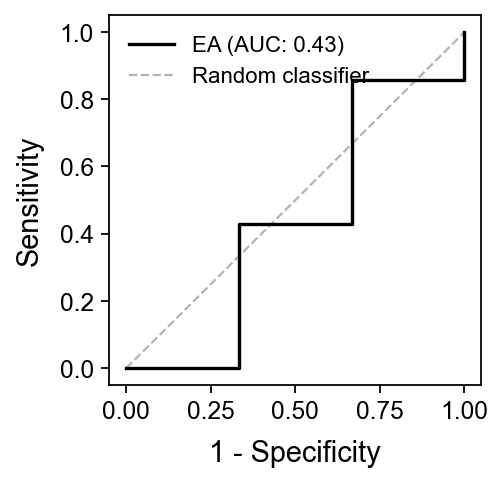

In [44]:
#4wks
clf_4w = GradientBoostingClassifier(n_estimators=100, max_depth=3, 
                                    max_features=0.6, random_state=0, 
                                    min_samples_leaf=2, learning_rate=0.4).fit(test_train_split(df_4w, 0.25)[0], 
                                                                               test_train_split(df_4w, 0.25)[1])

plot_single_wk(df_4w, clf_4w, 0.25)

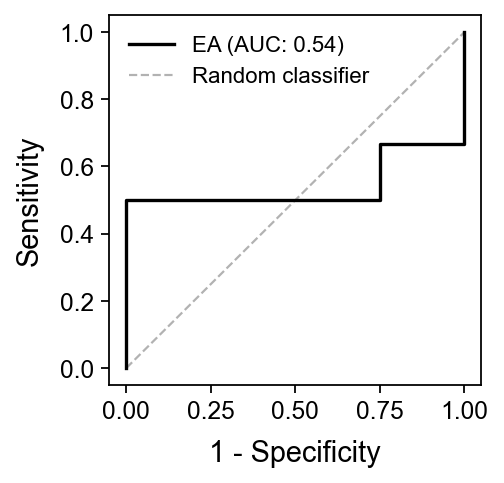

In [51]:
# #5wks
clf_5w = GradientBoostingClassifier(n_estimators=500, max_depth=4,
                                    max_features=0.6, random_state=42, 
                                    min_samples_leaf=4, learning_rate=0.1).fit(test_train_split(df_5w, 0.25)[0], 
                                                                               test_train_split(df_5w, 0.25)[1])

plot_single_wk(df_5w, clf_5w, 0.25)

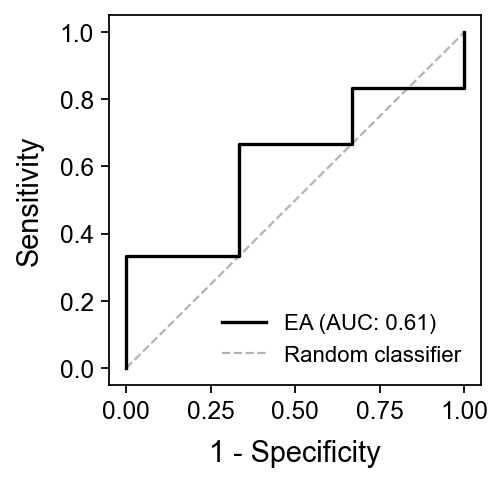

In [52]:
#6wks
clf_6w = GradientBoostingClassifier(n_estimators=100, max_depth=2,
                                    max_features=0.6, random_state=0, 
                                    min_samples_leaf=2, learning_rate=0.6).fit(test_train_split(df_6w, 0.25)[0],
                                                                               test_train_split(df_6w, 0.25)[1])

plot_single_wk(df_6w, clf_6w, 0.25)

In [53]:
plot_roc_allwks(df_4w, df_5w, df_6w, clf_4w, clf_5w, clf_6w, 0.25)

### SHAP value feature section

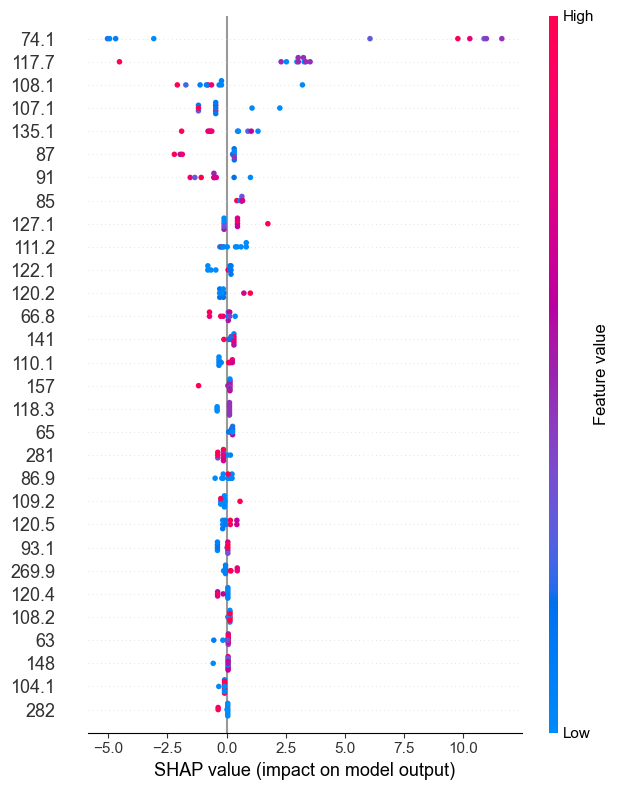

In [75]:
shap_summary_plot(clf_4w, df_4w, 0.25, 30)

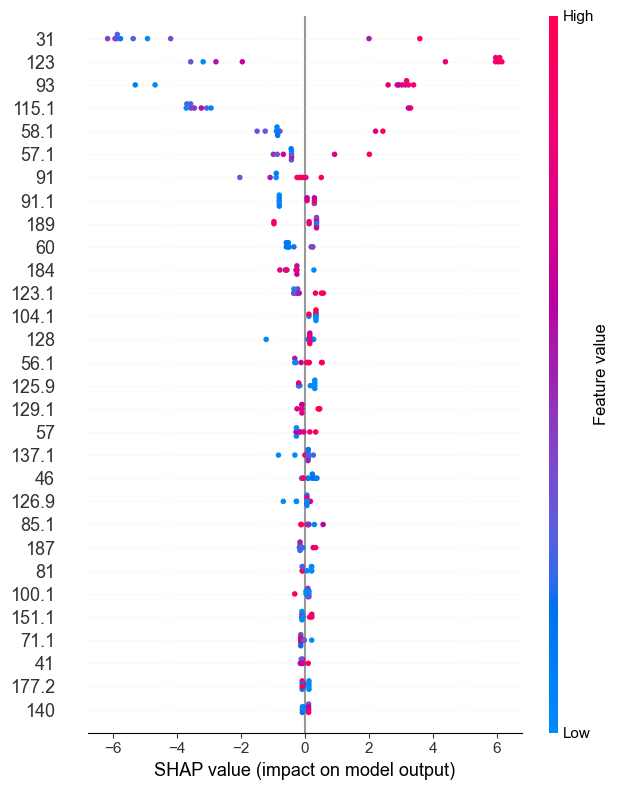

In [76]:
shap_summary_plot(clf_5w, df_5w, 0.25, 30)

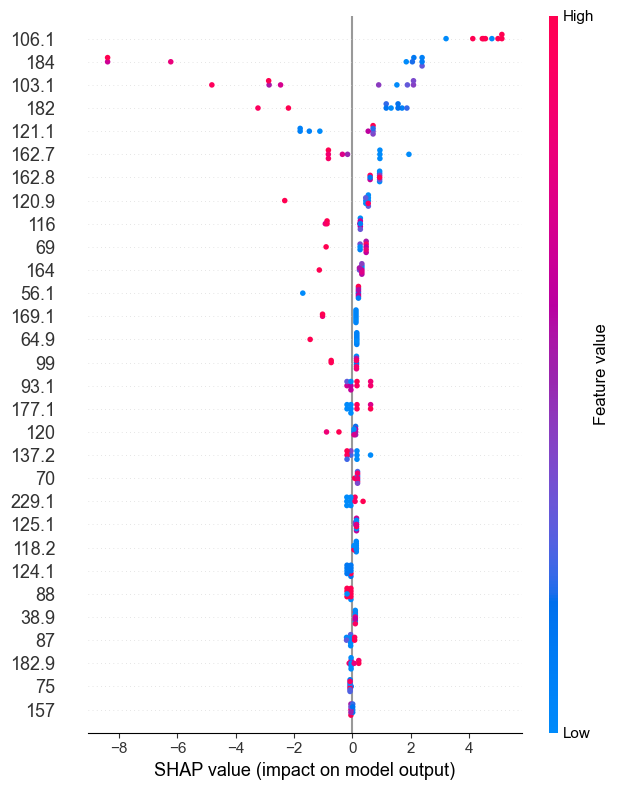

In [77]:
shap_summary_plot(clf_6w, df_6w, 0.25, 30)

In [44]:
feature_importance(clf_4w, df_4w, 0.25, 5)

,m/z,feature_vals
110,137.0,6.019595
78,117.7,3.048285
151,183.0,1.756962
162,281.1,0.848463
99,126.0,0.783800


In [40]:
feature_importance(clf_5w, df_5w, 0.25, 5)

,m/z,feature_vals
573,119.98,3.636236
691,131.00,3.374458
360,101.10,2.894107
322,97.09,2.717004
436,111.01,1.400842


In [64]:
feature_importance(clf_6w, df_6w, 0.25, 5)

,m/z,feature_vals
147,106.1,5.397309
339,184.0,2.743552
333,182.0,1.405238
202,121.1,1.135863
288,162.7,1.124871


### Cross validation

In [ ]:
#4wks 
kfold_4w = GradientBoostingClassifier(n_estimators=100, max_depth=3, 
                                    max_features=0.6, random_state=0, 
                                    min_samples_leaf=2, learning_rate=0.4)

train_4w = test_train_split(df_4w, 0.25)
cross_val_with_f1(kfold_4w, train_4w[0], train_4w[1])

In [ ]:
#5w
kfold_5w = GradientBoostingClassifier(n_estimators=500, max_depth=4,
                                    max_features=0.6, random_state=42, 
                                    min_samples_leaf=4, learning_rate=0.1)

train_5w = test_train_split(df_5w, 0.25)
cross_val_with_f1(kfold_5w, train_5w[0], train_5w[1])

In [ ]:
#6w
kfold_6w = GradientBoostingClassifier(n_estimators=100, max_depth=2,
                                    max_features=0.6, random_state=0, 
                                    min_samples_leaf=2, learning_rate=0.6)

train_6w = test_train_split(df_6w, 0.25)
cross_val_with_f1(kfold_6w, train_6w[0], train_6w[1])